In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
from matplotlib import pyplot as plt
from spikingjelly.activation_based import neuron, encoding, functional, surrogate, layer
from spikingjelly import visualizing


In [24]:
from fc_lif_Classification import SNN

In [25]:
model = SNN(2.0)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

checkpoint = torch.load('/home/shihao/ProjectDiego/tutorials/spikingJelly/logs/fc_T80_b64_adam_lr0.001/checkpoint_max.pth')
model.load_state_dict(checkpoint['net'])
optimizer.load_state_dict(checkpoint['optimizer'])
epoch = checkpoint['epoch']
max_test_acc = checkpoint['max_test_acc']

model.eval()


SNN(
  (layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1, step_mode=s)
    (1): Linear(in_features=784, out_features=10, bias=False)
    (2): LIFNode(
      v_threshold=1.0, v_reset=0.0, detach_reset=False, step_mode=s, backend=torch, tau=2.0
      (surrogate_function): ATan(alpha=2.0, spiking=True)
    )
  )
)

In [26]:
v_t = np.load('/home/shihao/ProjectDiego/tutorials/spikingJelly/logs/fc_T80_b64_adam_lr0.001/v_t_array.npy')
s_t = np.load('/home/shihao/ProjectDiego/tutorials/spikingJelly/logs/fc_T80_b64_adam_lr0.001/s_t_array.npy')


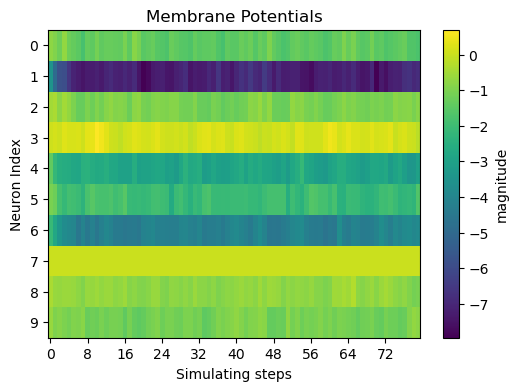

In [27]:
visualizing.plot_2d_heatmap(v_t, 'Membrane Potentials', 'Simulating steps', 'Neuron Index', int_x_ticks=True, int_y_ticks=True,
                    plot_colorbar=True, colorbar_y_label='magnitude', x_max=None, figsize=(6, 4), dpi=100)
plt.show()

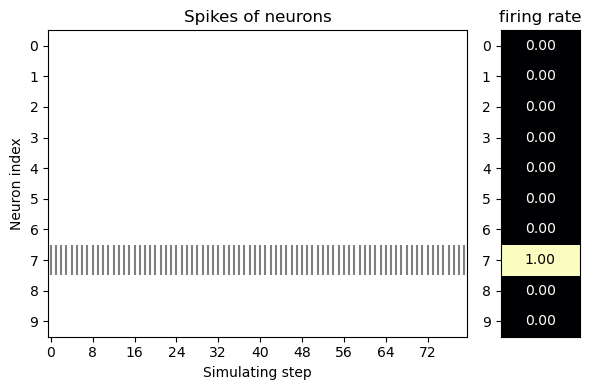

In [28]:
visualizing.plot_1d_spikes(s_t, 'Spikes of neurons', 'Simulating step', 'Neuron index', int_x_ticks=True, int_y_ticks=True,
                   plot_firing_rate=True, firing_rate_map_title='firing rate', figsize=(6, 4), dpi=100)
plt.show()